<a href="https://colab.research.google.com/github/NMashalov/Python-MIPT-education-course-2023-Spring/blob/main/%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_(%D1%82%D1%80%D0%B5%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача занятия научится строить многостадийные процессы обработки

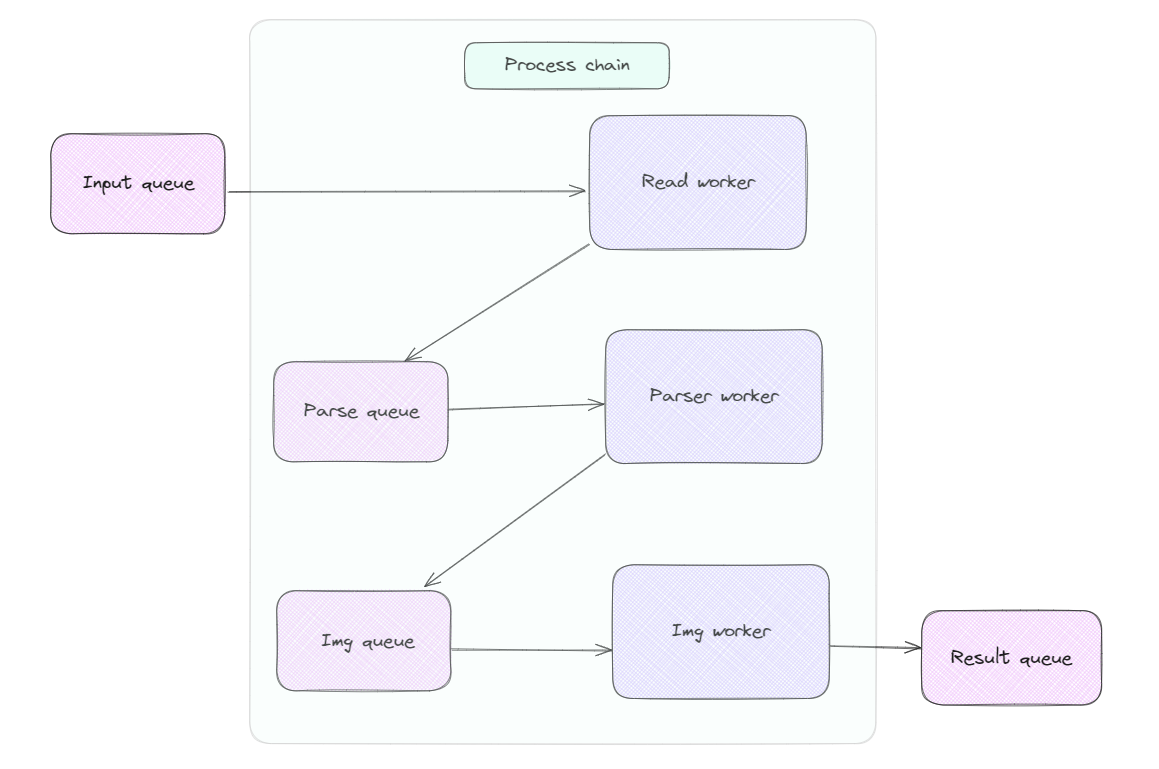

Соберем данные с https://www.varnike.ru/page01.html

In [69]:
import requests
import io
doc = requests.get(
    'https://www.varnike.ru/page01.html',
    headers={
        "User-Agent":'My User Agent 1.0',
    }
)

In [18]:
text = doc.content.decode('utf-8')
text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html>\r\n <head>\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n  <meta name="keywords" content="логические задачи, психологический практикум, инспектор Варнике, преступники, преступления, сайты с задачами">\r\n  <meta name="description" content="Логические задачи с участием инспектора Варнике">\r\n  <link rel="stylesheet" type="text/css" href="style01.css" />\r\n  <title>Логические задачи с участием инспектора Варнике</title>\r\n </head>\r\n <body>\r\n<input type="button" value="Вернуться на главную" class="button" onclick="javascript:window.location=\'index.html\'"/>\r\n<img src="./Detektiv/Varnike.jpg" width="130px" height="180px" alt="logo" align="left" >\r\n <pre>    Автор рисунков к рассказам про инспектора Варнике из немецкого журнала «Ойленшпигель» – художник Гарри Паршау. \r\n    Он создал незабываемый образ инспектора,который носит только кл

Давай достанем все ссылки

In [19]:
from bs4 import BeautifulSoup
from pathlib import Path
import io
soup = BeautifulSoup(io.StringIO(text), 'html.parser')

In [24]:
references = [item['href'] for item in soup.find_all('a')]
references

['./Detektiv/1-VARNIKE/page0101.html',
 './Detektiv/1-VARNIKE/page0111.html',
 './Detektiv/1-VARNIKE/page0121.html',
 './Detektiv/1-VARNIKE/page0131.html',
 './Detektiv/1-VARNIKE/page0141.html',
 './Detektiv/1-VARNIKE/page0151.html',
 './Detektiv/1-VARNIKE/page0102.html',
 './Detektiv/1-VARNIKE/page0112.html',
 './Detektiv/1-VARNIKE/page0122.html',
 './Detektiv/1-VARNIKE/page0132.html',
 './Detektiv/1-VARNIKE/page0142.html',
 './Detektiv/1-VARNIKE/page0152.html',
 './Detektiv/1-VARNIKE/page0103.html',
 './Detektiv/1-VARNIKE/page0113.html',
 './Detektiv/1-VARNIKE/page0123.html',
 './Detektiv/1-VARNIKE/page0133.html',
 './Detektiv/1-VARNIKE/page0143.html',
 './Detektiv/1-VARNIKE/page0153.html',
 './Detektiv/1-VARNIKE/page0104.html',
 './Detektiv/1-VARNIKE/page0114.html',
 './Detektiv/1-VARNIKE/page0124.html',
 './Detektiv/1-VARNIKE/page0134.html',
 './Detektiv/1-VARNIKE/page0144.html',
 './Detektiv/1-VARNIKE/page0154.html',
 './Detektiv/1-VARNIKE/page0105.html',
 './Detektiv/1-VARNIKE/pa

In [23]:
BASE_URL = 'https://www.varnike.ru'

In [25]:
goal_list = [BASE_URL + ref[1:] for ref in references]

In [26]:
goal_list

['https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0141.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0151.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0102.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0112.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0122.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0132.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0142.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0152.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0103.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0113.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0123.html',
 'https://www.varnike.ru/Detektiv/1-VARNIKE/page0133.html',
 'https://www.varnike.ru/Detektiv/1-VARN

In [21]:
!pip install -q httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


Реализуем первую стадию, чтобы посмотреть как это работает

Мы будем работать с асинхроным клиентом `httpx` https://www.python-httpx.org/
и стандартной библиотекой `asyncio`

В качестве очереди мы будем использовать `asyncio.Queue`. На самом деле это обычная `collection.deque` с реализованными операциями асинхронного чтения и запис

In [42]:
import asyncio
import httpx


async def task_worker(id : int, in_queue: asyncio.Queue, out_queue: asyncio.Queue):
    # create context for each task
    async with httpx.AsyncClient() as client:
        while True:
            url = await in_queue.get()
            print(f"[Worker {id=}] Processing '{url=}'")

            data = await client.get(url)
            print(f'Status {data}')
            await out_queue.put(data)

            # inform queue that we are done with data we took
            in_queue.task_done()


async def main():
    """
    Starter code
    """

    # создаем входную и выходную очередь
    in_queue = asyncio.Queue()
    out_queue = asyncio.Queue()

    # создаем work-еров
    pool = [asyncio.create_task(task_worker(worker_id, in_queue, out_queue)) for worker_id in range(3)]

    # populate queue with numbers as user's name
    for item in goal_list:
        in_queue.put_nowait(item)

    # ждем когда все очереди исполнятся
    await in_queue.join()

    # cancel tasks
    for task in pool:
        task.cancel()

    # check data
    print(f"[Main task] Processed {out_queue.qsize()} data!")
    return out_queue



Jupyter ноутбук позволяет нативно работать с асинхронными операциями. Просто напиште `await` :)

In [34]:
results = await main()

[Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0101.html''
[Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0111.html''
[Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0121.html''
Status <Response [200 OK]>
[Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0131.html''
Status <Response [200 OK]>
[Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0141.html''
Status <Response [200 OK]>
[Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0151.html''
Status <Response [200 OK]>
[Worker id=2] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0102.html''
Status <Response [200 OK]>
[Worker id=1] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0112.html''
Status <Response [200 OK]>
[Worker id=0] Processing 'url='https://www.varnike.ru/Detektiv/1-VARNIKE/page0122.html''
Status <Response [200 OK]>
[Worker id

In [38]:
item = results._queue.pop()

ПО

In [44]:
text = item.content.decode('utf-8')
text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html>\r\n <head>\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n  <meta name="keywords" content="логические задачи, психологический практикум, Племянник не подкачал, инспектор Варнике, преступники, преступления, сайты с задачами, детектив, детективный">\r\n  <meta name="description" content="Инспектор Варнике Задача Племянник не подкачал">\r\n  <link rel="stylesheet" type="text/css" href="../../style0101.css"/>\r\n  <title>Инспектор Варнике "Племянник не подкачал"</title>\r\n </head>\r\n <body>\r\n<input type="button" value="ВАРНИКЕ - все задачи" class="button" onclick="javascript:window.location=\'../../page01.html\'"/>\r\n <pre> <img src="p0140.jpg" width="400px" height="200px" alt="logo">\r\n  <b>  ПЛЕМЯННИК НЕ ПОДКАЧАЛ</b> \r\n  Тетя Адельхайд, которая ждала своего знаменитого племянника недалеко от сберегательной кассы, \r\n  бросилась ему навстр

In [46]:
from bs4 import BeautifulSoup
import io
soup = BeautifulSoup(io.StringIO(text), 'html.parser')

Первая часть
Тэг `<pre>` - предформатированный текст

In [58]:
pre_elems = soup.find("pre")

In [59]:
[item for item in pre_elems]

[' ',
 <img alt="logo" height="200px" src="p0140.jpg" width="400px"/>,
 '\r\n  ',
 <b>  ПЛЕМЯННИК НЕ ПОДКАЧАЛ</b>,
 ' \r\n  Тетя Адельхайд, которая ждала своего знаменитого племянника недалеко от сберегательной кассы, \r\n  бросилась ему навстречу, не скрывая своего нетерпения. \r\n  Какая-то женщина только что вырвала у нее сумочку с деньгами и тотчас же исчезла. \r\n— Скорее всего она скрылась в самой сберегательной кассе, — заметил инспектор Варнике. — Попробуем ее \r\n  И в самом деле, тетя Адельхайд сразу увидела свою сумку, которая стояла на скамейке между двумя женщинами. \r\n  Она была раскрыта. Когда инспектор бросил внимательный взгляд на сумку, обе женщины, заметив это, \r\n  встали и прошли в другой конец комнаты. Сумочка осталась на скамье.\r\n— Но я не знаю, которая из них украла мою сумку. Я не успела ее разглядеть, — сказала тетя. \r\n— Ну, это пустяки, — ответил Варнике. — Допросим обеих, но думаю, что сумку у тебя украла... \r\n',
 <b id="zag"> Кого обвинил инспектор 

Проверить что элемент имеет тэг можно с помощью свойства name

In [60]:
[item.name for item in pre_elems]

[None, 'img', None, 'b', None, 'b', None]

Стратегия извлечения
- `img` - картинка
- `None` -  постановка
- Первый `b` - название
- Второй `b` - вопрос


In [68]:
setting = [item.text for item in pre_elems if item.name is None]
title, question = [item.text for item in pre_elems if item.name == 'b']
img = pre_elems.find('img')

['  ПЛЕМЯННИК НЕ ПОДКАЧАЛ', ' Кого обвинил инспектор Варнике?  ']

In [54]:
soup.find("pre").text

' \r\n    ПЛЕМЯННИК НЕ ПОДКАЧАЛ \r\n  Тетя Адельхайд, которая ждала своего знаменитого племянника недалеко от сберегательной кассы, \r\n  бросилась ему навстречу, не скрывая своего нетерпения. \r\n  Какая-то женщина только что вырвала у нее сумочку с деньгами и тотчас же исчезла. \r\n— Скорее всего она скрылась в самой сберегательной кассе, — заметил инспектор Варнике. — Попробуем ее \r\n  И в самом деле, тетя Адельхайд сразу увидела свою сумку, которая стояла на скамейке между двумя женщинами. \r\n  Она была раскрыта. Когда инспектор бросил внимательный взгляд на сумку, обе женщины, заметив это, \r\n  встали и прошли в другой конец комнаты. Сумочка осталась на скамье.\r\n— Но я не знаю, которая из них украла мою сумку. Я не успела ее разглядеть, — сказала тетя. \r\n— Ну, это пустяки, — ответил Варнике. — Допросим обеих, но думаю, что сумку у тебя украла... \r\n Кого обвинил инспектор Варнике?  \r\n'

In [47]:
soup.find_all('b')

[<b>  ПЛЕМЯННИК НЕ ПОДКАЧАЛ</b>,
 <b id="zag"> Кого обвинил инспектор Варнике?  </b>]

In [49]:
soup.find("b", {"id": "zag"})

<b id="zag"> Кого обвинил инспектор Варнике?  </b>

<pre> <img alt="logo" height="200px" src="p0140.jpg" width="400px"/>
  <b>  ПЛЕМЯННИК НЕ ПОДКАЧАЛ</b> 
  Тетя Адельхайд, которая ждала своего знаменитого племянника недалеко от сберегательной кассы, 
  бросилась ему навстречу, не скрывая своего нетерпения. 
  Какая-то женщина только что вырвала у нее сумочку с деньгами и тотчас же исчезла. 
— Скорее всего она скрылась в самой сберегательной кассе, — заметил инспектор Варнике. — Попробуем ее 
  И в самом деле, тетя Адельхайд сразу увидела свою сумку, которая стояла на скамейке между двумя женщинами. 
  Она была раскрыта. Когда инспектор бросил внимательный взгляд на сумку, обе женщины, заметив это, 
  встали и прошли в другой конец комнаты. Сумочка осталась на скамье.
— Но я не знаю, которая из них украла мою сумку. Я не успела ее разглядеть, — сказала тетя. 
— Ну, это пустяки, — ответил Варнике. — Допросим обеих, но думаю, что сумку у тебя украла... 
<b id="zag"> Кого обвинил инспектор Варнике?  </b>
</pre>

Для кодирования картинки в текст используют алгоритм `base64`. В python уже есть готовая реализация

In [ ]:
import base64

Итог обработки